In [13]:
import torch
import numpy as np
import random
import matplotlib.pyplot as plt
import torch.nn as nn
import math

In [67]:
# threads
torch.get_num_threads()

6

In [66]:
# f: 字符串 format 函数
a = '123'
print(f"a is: {a}")
# 表示保留 1 位小数总长度为 5 个字节的的浮点数
print(f"{1e6:>5.1f}") 

a is: 123
1000000.0


In [63]:
# reshape 重新变形
a = torch.rand(2,3)
b = a.reshape(-1, a.shape[-1], 1)
c = a.reshape(-1, 1, a.shape[-1])
print(a)
print(a.shape)
print(b.shape)
print(c.shape)

tensor([[0.0740, 0.8700, 0.8036],
        [0.4347, 0.2328, 0.5896]])
torch.Size([2, 3])
torch.Size([2, 3, 1])
torch.Size([2, 1, 3])


In [54]:
# bmm 批量乘积

a = torch.randn(10, 3, 4)
b = torch.randn(10, 4, 5)
c = torch.bmm(input, mat2)
print(c.size())

torch.Size([10, 3, 5])


In [43]:

# mul 哈德玛积
a = torch.tensor([[1,2,3], [2,3,4]])
print(a.mul(a))

# mm or matmul 矩阵乘积
b = torch.tensor([[1,2], [3,4], [5,6]])
print(a.mm(b))
print(a.matmul(b))

# equal 相等
print(a.mm(b).equal(a.matmul(b)))


# dot 点积，只用于 1D tensor (向量)，且向量长度相等
c = torch.tensor([1,2,5])
d = torch.tensor([3,4,5])
print(c.dot(d))



tensor([[ 1,  4,  9],
        [ 4,  9, 16]])
tensor([[22, 28],
        [31, 40]])
tensor([[22, 28],
        [31, 40]])
True
tensor(36)


In [52]:
# numel 元素个数

a = torch.tensor([[2,3,5], [3,2,2], [2,5,5]])
print(a.numel())

# len 获得元素维度个数
print(len(a.size()))

9
2


In [12]:
# allclose 接近
a = torch.tensor([1, 2, 3e-09])
b = torch.tensor([1, 2, 3e-11])
c = torch.tensor([1, 2, 3e-08])

print(a.allclose(b))
print(b.allclose(c))

True
False


In [60]:
# max 返回最大值的项，索引
a = torch.tensor([[0,3,4]])
item, index = a.max(1)
print(item)
print(index)

tensor([4])
tensor([2])


In [11]:
print(__name__)

__main__


In [9]:
# log
a = torch.randn(2,3,4)
loga = a.log2()
print("a is", a)
print("shape of a is {}".format(a.size()), '\n')
print("log a is : {}".format(loga), '\n')

# select 选择第 0 维（最外层）所有行、列
print("slice log a", loga[0, :, :])

a is tensor([[[ 1.5674, -0.7047, -0.6260,  0.3988],
         [-0.6553,  2.2142, -0.8052, -2.2858],
         [-0.1376, -2.2843,  0.2720, -0.1388]],

        [[-0.8089,  0.3537,  0.3438, -0.7752],
         [-0.6980,  0.7827, -0.9214,  0.5339],
         [ 0.2284,  1.0296,  0.6252, -0.3889]]])
shape of a is torch.Size([2, 3, 4]) 

log a is : tensor([[[ 0.6484,     nan,     nan, -1.3262],
         [    nan,  1.1468,     nan,     nan],
         [    nan,     nan, -1.8782,     nan]],

        [[    nan, -1.4996, -1.5402,     nan],
         [    nan, -0.3535,     nan, -0.9052],
         [-2.1307,  0.0421, -0.6776,     nan]]]) 

slice log a tensor([[ 0.6484,     nan,     nan, -1.3262],
        [    nan,  1.1468,     nan,     nan],
        [    nan,     nan, -1.8782,     nan]])


In [57]:
# t 2D tensor 形状变换
a = torch.randn(2, 3)
print(a.size())
print(a.t().size())

torch.Size([2, 3])
torch.Size([3, 2])


In [23]:
# relu
a = torch.arange(-6, 6).view(3, 4)
print(a)
print(a.relu())
print(a)
print(a.relu_())

tensor([[-6, -5, -4, -3],
        [-2, -1,  0,  1],
        [ 2,  3,  4,  5]])
tensor([[0, 0, 0, 0],
        [0, 0, 0, 1],
        [2, 3, 4, 5]])
tensor([[-6, -5, -4, -3],
        [-2, -1,  0,  1],
        [ 2,  3,  4,  5]])
tensor([[0, 0, 0, 0],
        [0, 0, 0, 1],
        [2, 3, 4, 5]])


In [24]:
# 点积
a = torch.arange(0, 6).view(2, 3)
b = torch.arange(0, 6).view(2, 3)
print(a * b)

tensor([[ 0,  1,  4],
        [ 9, 16, 25]])


In [25]:
# python 没有函数提升
# a = before(1)

def before(num):
    print(num + 1)


In [26]:
# clone， detach

t = torch.tensor([[1,2],[3,4]], requires_grad=True, dtype=torch.float32)

t1 = t.clone()

t2 = t.clone().requires_grad_(True)

# 复制 tensor
t3 = t.clone().detach().requires_grad_(True)

print(t)
print(t1)
print(t2)
print(t3)



tensor([[1., 2.],
        [3., 4.]], requires_grad=True)
tensor([[1., 2.],
        [3., 4.]], grad_fn=<CloneBackward>)
tensor([[1., 2.],
        [3., 4.]], grad_fn=<CloneBackward>)
tensor([[1., 2.],
        [3., 4.]], requires_grad=True)


In [27]:
# Conv2D
input = torch.randn(32, 1, 5, 5) # 32 张 单通道 5 x 5 像素图片

m = nn.Sequential(
    # 输入通道 1, 输出通道 10, 卷积核大小 5, 步长 1, 填充 1. 输出 shape: (32, 10, 3 , 3)
    nn.Conv2d(1, 10, 5, 1, 1), # 3 = (5 + 1 x 2) - 5 + 1
    nn.Flatten() # start_dim = 1, return [32, 10 x 3 x 3]
)

output = m(input)
print(output.shape)
print(output.size())

torch.Size([32, 90])
torch.Size([32, 90])


In [28]:
# 减法广播
t1 = torch.tensor([[1, 2, 3]])
print(t1 - 1)

tensor([[0, 1, 2]])


In [29]:
a = torch.tensor([[0, 1, 2], [1, 2, 3]])
print(a[0][1].item())

# tensor 索引赋值
a[0][1] = 5

print(a)

print(a / 5)
print(a / torch.tensor(5))

print(a / torch.tensor([[1], [2]]))

1
tensor([[0, 5, 2],
        [1, 2, 3]])
tensor([[0.0000, 1.0000, 0.4000],
        [0.2000, 0.4000, 0.6000]])
tensor([[0.0000, 1.0000, 0.4000],
        [0.2000, 0.4000, 0.6000]])
tensor([[0.0000, 5.0000, 2.0000],
        [0.5000, 1.0000, 1.5000]])


In [30]:
# softmax
# softmax 运算把特征值转变为概率，合为 1

X = torch.tensor([[3, 12, 5],[21, 9, 4], [2, 2, 31]], dtype=torch.float64)

def softmax1(X):
    clone = torch.clone(X)
    base = torch.zeros(X.shape[0], 1)
    for i in range(X.shape[0]):
        line = 0
        for j in range(X.shape[1]):
            item = math.exp(X[i][j].item())
            clone[i][j] = item
            line += item
        base[i][0] += line
    return clone / base

def softmax2(X):
    X_exp = X.exp()
    partition = X_exp.sum(dim=1, keepdim=True)
    return X_exp / partition


print(softmax1(X), '\n')
print(softmax2(X), '\n')
    

tensor([[1.2328e-04, 9.9897e-01, 9.1094e-04],
        [9.9999e-01, 6.1442e-06, 4.1399e-08],
        [2.5437e-13, 2.5437e-13, 1.0000e+00]], dtype=torch.float64) 

tensor([[1.2328e-04, 9.9897e-01, 9.1094e-04],
        [9.9999e-01, 6.1442e-06, 4.1399e-08],
        [2.5437e-13, 2.5437e-13, 1.0000e+00]], dtype=torch.float64) 



In [59]:
# CrossEntropyLoss
import math

# input
X = torch.tensor([[7, 9, 1],[2, 5, 9], [9, 13, 52]], dtype=torch.float64)


y = torch.tensor([1, 1, 2])

lossfn = nn.CrossEntropyLoss()

# 自定义实现 cross entropy
def cross_entropy(y_hat, y):
    y_hat = softmax2(y_hat)
    return (- torch.log(y_hat.gather(1, y.view(-1, 1)))).sum() / y_hat.shape[1]

    
loss1 = cross_entropy(X, y)

loss2 = lossfn(X, y)




print('loss1: custom cross entropy', loss1.item())

print('loss2: torch.CrossEntropy',loss2.item())









loss1: custom cross entropy 1.382089483260221
loss2: torch.CrossEntropy 1.382089483260221


In [32]:
# torch.randn
torch.randn((2,3))
torch.randn(2)

tensor([0.4973, 1.0002])

In [33]:
from collections import OrderedDict
# OrderedDict
a = OrderedDict([('a', 1), ('b', 2)])
print(a)

OrderedDict([('a', 1), ('b', 2)])


tensor([   nan,   -inf, 0.0000, 0.9995, 2.3026])
/Users/float/opt/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  """


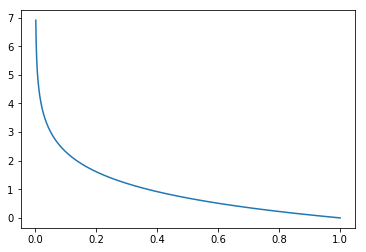

In [34]:
# torch.log
a = torch.tensor([-1, 0, 1, 2.717, 10])
print(torch.log(a))

x = torch.range(0, 1, 0.001)
plt.plot(x, -torch.log(x))


In [35]:
# cross entropy

def cross_entropy(y_hat, y):
    return - torch.log(y_hat.gather(1, y.view(-1, 1)))


y_hat = torch.tensor([[0.6, 0.3, 0.1], [0.3, 0.2, 0.5], [0.03, 0.9, 0.07], [0.0, 1.0, 0.0]])
y = torch.tensor([0, 2, 1, 1])

print(cross_entropy(y_hat, y))


tensor([[0.5108],
        [0.6931],
        [0.1054],
        [-0.0000]])


In [36]:
# gather
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y = torch.tensor([0, 2])
print(y.view(-1, 1))

# Tensor.gather(dim, index) [[[0.1, 0.3, 0.6][0]], [[0.3, 0.2, 0.5][2]]]
y_g = y_hat.gather(1, y.view(-1, 1))
print(y_g)

tensor([[0],
        [2]])
tensor([[0.1000],
        [0.5000]])


In [37]:
# sum
A = torch.tensor([[1, 2, 3], [4, 5, 6]])
print('A.sum(dim=1, keepdim=True)\n',A.sum(dim=0, keepdim=True), '\n')
print('A.sum(dim=1, keepdim=True)\n', A.sum(dim=1, keepdim=True), '\n')
print('A.sum(dim=1)\n', A.sum(dim=1), '\n')

B = torch.tensor([[[1, 2, 3], [2, 3, 4]], [[2,3,5], [2,3,1]], [[2,3,5], [1,3,5]]])

# sum(-1) 代表最内层维度
print('B.sum(2).equal(B.sum(-1)) \n',B.sum(2).equal(B.sum(-1)), '\n')

AEXP = A.exp()
ASUM = A.exp().sum(dim=1, keepdim=True)
ASMAX = AEXP / ASUM
print('AEXP', AEXP)
print('ASUM', ASUM)
print('ASMAX', ASMAX)

A.sum(dim=1, keepdim=True)
 tensor([[5, 7, 9]]) 

A.sum(dim=1, keepdim=True)
 tensor([[ 6],
        [15]]) 

A.sum(dim=1)
 tensor([ 6, 15]) 

B.sum(2).equal(B.sum(-1)) 
 True 

AEXP tensor([[  2.7183,   7.3891,  20.0855],
        [ 54.5982, 148.4132, 403.4288]])
ASUM tensor([[ 30.1929],
        [606.4401]])
ASMAX tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])


In [38]:
# return for loop list
def get_labels(indices):
    labels = ['one', 'two', 'three', 'four']
    return [labels[i] for i in indices]

get_labels([1,2,2,3,2,1,3])

['two', 'three', 'three', 'four', 'three', 'two', 'four']

In [39]:
# zip: 函数用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的对象，这样做的好处是节约了不少的内存
a = [1, 2, 3]
b = [4, 5, 6]
c = ['a', 'b', 'c']

zipped = zip(a, b)
print(zipped)
print(list(zipped))

[(1, 4), (2, 5), (3, 6)]


In [40]:
# random.shuffle
indices = list(range(10))
random.shuffle(indices)
ind2 = indices[0:5]
print(ind2)
print(indices)

[1, 2, 5, 4, 6]
[1, 2, 5, 4, 6, 7, 8, 9, 3, 0]


In [41]:
# np.random.normal
np.random.normal(0, 0.01, (5,2))

array([[-0.01182459, -0.01605432],
       [ 0.01190175,  0.00637104],
       [ 0.00035111, -0.01955267],
       [-0.00733082, -0.00359389],
       [-0.00025187, -0.01746229]])

In [42]:
# function
def te_none(a):
    print(a is None)

te_none(None)

True


In [43]:
# dropout
a = torch.arange(6).view(2,3)
print(a)

drop = 0.5

mask = (torch.rand(a.shape) < (1-drop)).float()
print(mask)
a = mask.mul(a) / (1-drop)
print(a)

tensor([[0, 1, 2],
        [3, 4, 5]])
tensor([[1., 0., 0.],
        [0., 0., 0.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [44]:
# .data
w = torch.tensor([1,2,3])
w.data

tensor([1, 2, 3])

In [45]:
# index_select
# dim (int) – the dimension in which we index
# index (IntTensor or LongTensor) – the 1-D tensor containing the indices to index

a = torch.tensor([[1,2,3,4], [2,3,4,5], [3,4,5,6],[2,3,5,1]])
b = a.index_select(0, torch.tensor([0,1,3]))
print(b)

c = [0,1,2,3,4,5]
d = c[0:3]
print(d)

tensor([[1, 2, 3, 4],
        [2, 3, 4, 5],
        [2, 3, 5, 1]])
[0, 1, 2]


In [46]:
# create indices list
a = 10
b = list(range(a))
print(b[0:5])

[0, 1, 2, 3, 4]


In [47]:
# item
a = torch.tensor([3])
print(a.item())

3


In [48]:
# 正确率
y_hat = torch.tensor([[0.5, 0.2, 0.3], [0.1, 0.2, 0.7]])
y = torch.tensor([0, 2])
print('accu', (y_hat.argmax(dim=1) == y).sum().item() / y.shape[0])

accu 1.0


In [49]:
# shape
a = torch.rand((2,3,4))
print(a)
print(a.shape)
print(a.shape[0])

b = a.view(a.shape[0], -1)
print(b)
print(b.shape)

c = torch.tensor([3,4,5,6])
d = torch.tensor([3,2,5,6])
print(c.shape)
print(c == d)

tensor([[[3.3371e-02, 1.2026e-01, 2.5542e-01, 3.5712e-01],
         [7.3754e-01, 5.8170e-01, 4.4511e-01, 7.8793e-01],
         [4.9313e-01, 8.2410e-02, 1.4188e-01, 7.6566e-02]],

        [[9.8942e-01, 4.0066e-01, 7.6646e-01, 4.0562e-01],
         [6.3949e-01, 8.3416e-01, 8.6647e-01, 4.7695e-01],
         [8.5930e-01, 3.0043e-01, 9.3859e-04, 2.9686e-02]]])
torch.Size([2, 3, 4])
2
tensor([[3.3371e-02, 1.2026e-01, 2.5542e-01, 3.5712e-01, 7.3754e-01, 5.8170e-01,
         4.4511e-01, 7.8793e-01, 4.9313e-01, 8.2410e-02, 1.4188e-01, 7.6566e-02],
        [9.8942e-01, 4.0066e-01, 7.6646e-01, 4.0562e-01, 6.3949e-01, 8.3416e-01,
         8.6647e-01, 4.7695e-01, 8.5930e-01, 3.0043e-01, 9.3859e-04, 2.9686e-02]])
torch.Size([2, 12])
torch.Size([4])
tensor([ True, False,  True,  True])


In [50]:
# argmax
a = torch.tensor([
    [9,2,1], 
    [4,5,8]])

print('a.argmax(dim=0), ', a.argmax(dim=0))

print('a.argmax(dim=1)', a.argmax(dim=1))


a.argmax(dim=0),  tensor([0, 1, 1])
a.argmax(dim=1) tensor([0, 2])


In [10]:
# net.parametes()
import torch
l1 = torch.nn.Linear(3,4, bias=True)
l2 = torch.nn.Linear(4,5, bias=True)
net = torch.nn.Sequential(l1, l2)
print(l1)
print(l2, '\n')

w = torch.empty(3, 5)
torch.nn.init.normal(w, mean=100, std=10)
print(w)

print('parameters ----')

# 因为有 weight, bias 所以有 4 个参数层
for p in net.parameters():
    print(p)


Linear(in_features=3, out_features=4, bias=True)
Linear(in_features=4, out_features=5, bias=True) 

tensor([[107.2869, 131.8388, 100.7577, 108.4349, 108.2134],
        [ 98.8282,  94.3752,  99.5952, 102.5364,  95.6727],
        [ 79.5264, 109.0457, 104.0702,  96.8401, 106.6898]])
parameters ----
Parameter containing:
tensor([[ 0.3836,  0.5658, -0.1112],
        [-0.5445,  0.3475, -0.0017],
        [ 0.4988, -0.1029, -0.4215],
        [ 0.0107,  0.1043,  0.0869]], requires_grad=True)
Parameter containing:
tensor([-0.4313, -0.0644, -0.4330,  0.3538], requires_grad=True)
Parameter containing:
tensor([[ 0.2369,  0.2313,  0.0723,  0.4922],
        [ 0.0355,  0.3328,  0.1367, -0.4490],
        [ 0.4279,  0.4293, -0.3621,  0.3877],
        [-0.4180, -0.3217, -0.2471, -0.4196],
        [ 0.2387, -0.0290,  0.2865, -0.0016]], requires_grad=True)
Parameter containing:
tensor([ 0.1869, -0.0579, -0.0335,  0.2653,  0.3303], requires_grad=True)
ipykernel_launcher:10: UserWarning: nn.init.normal is no

In [52]:
# torch.linspace
import math
x = torch.linspace(-math.pi, math.pi, 2000)
print(x)


tensor([-3.1416, -3.1384, -3.1353,  ...,  3.1353,  3.1384,  3.1416])


In [53]:
# with torch.no_grad() 子树不记录梯度
x = torch.randn(10, 5, requires_grad = True)
y = torch.randn(10, 5, requires_grad = True)
z = torch.randn(10, 5, requires_grad = True)

n = x + y + z
print(n.requires_grad, '\n -----')

with torch.no_grad():
    w = x + y + z
    print(w.requires_grad)
    print(w.grad_fn)
print(w.requires_grad)

True 
 -----
False
None
False


In [55]:
# pow 次方
a = torch.tensor([[1,2,3], [2,3,4]])
print(a.pow(3))


tensor([[ 1,  8, 27],
        [ 8, 27, 64]])


In [55]:
# is vs ==
a = 1
b = 1
print(a==b)
print(a is b)
print('---')


a = 2.0
b = 2.0
print(a == b)
print(a is b)
print('---')

a = {'value': 1}
b = {'value': 1}
print(a == b)
print(a is b)
print(id(a) == id(b))

True
True
---
True
False
---
True
False
False


In [56]:
# unsequeeze 膨胀

a = torch.tensor([1,2,3,4,5])
b = torch.tensor([1,2,3])

print('squeeze 0', a.unsqueeze(0))
print('squeeze 1', a.unsqueeze(1))



squeeze 0 tensor([[1, 2, 3, 4, 5]])
squeeze 1 tensor([[1],
        [2],
        [3],
        [4],
        [5]])


In [57]:
# nn.Linear


m = torch.nn.Linear(3, 2, bias=True) # 创建 Linear 层时会随机初始化 w, b

# 5 x 3 矩阵
input = torch.tensor([
        [1,  2,  3],
        [5, 5,  1],
        [1,  3, 5],
        [ 1,  0, -1],
        [ 9, 1, -3]], dtype=torch.float32)

print(m.bias, m.weight)

print('output', m(input))

Parameter containing:
tensor([ 0.2118, -0.0729], requires_grad=True) Parameter containing:
tensor([[ 0.4899,  0.4989,  0.4731],
        [-0.2325, -0.5317, -0.2049]], requires_grad=True)
output tensor([[ 3.1186, -1.9836],
        [ 5.6286, -4.0987],
        [ 4.5636, -2.9252],
        [ 0.2286, -0.1004],
        [ 3.7003, -2.0821]], grad_fn=<AddmmBackward>)


In [58]:
# nn.Flatten

m0 = torch.nn.Flatten(0)
m1 = torch.nn.Flatten(1)
m2 = torch.nn.Flatten(2)
m3 = torch.nn.Flatten(3)

t = torch.tensor([[[3,2,3], [4,5,3]]])

class Flatten(nn.Module):
    def __init__(self, dim=0):
        super().__init__()
        self.dim = dim

    def forward(self, X):
        return X.view(X.shape[self.dim], -1)

print(Flatten(0)(t))


print(m0(t))
print(m1(t))
print(m2(t))

tensor([[3, 2, 3, 4, 5, 3]])
tensor([3, 2, 3, 4, 5, 3])
tensor([[3, 2, 3, 4, 5, 3]])
tensor([[[3, 2, 3],
         [4, 5, 3]]])
